### K-近邻算法

### 1、 K-近邻算法（KNN）概述 

KNN(k-Nearest Neighbor)算法，是通过测量不同特征值之间的距离进行分类。

算法思路:<br>如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别，其中K通常是不大于20的整数。KNN算法中，所选择的邻居都是已经正确分类的对象。该方法在定类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。

### ２、ＫＮＮ算法举例说明

如下图，绿色圆要被决定赋予哪个类?是红色三角形,还是蓝色四方形？
<br>1)如果K=3，由于红色三角形所占比例为2/3，绿色圆将被赋予红色三角形那个类;
<br>2)如果K=5，由于蓝色四方形比例为3/5，因此绿色圆被赋予蓝色四方形类。

由此也说明了KNN算法的结果很大程度取决于K的选择。

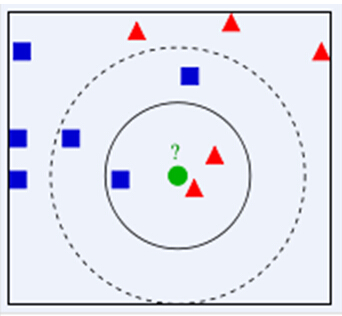

### ３、ＫＮＮ算法实现

在KNN中，通过计算对象间距离来作为各个对象之间的非相似性指标，避免了对象之间的匹配问题，在这里距离一般使用欧氏距离或曼哈顿距离。
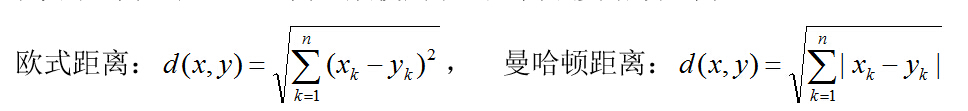

KNN算法数学描述：
<br>1）计算测试数据与各个训练数据之间的距离；
<br>2）按照距离的递增关系进行排序；
<br>3）选取距离最小的K个点；
<br>4）确定前K个点所在类别的出现频率；
<br>5）返回前K个点中出现频率最高的类别作为测试数据的预测分类。

### ４、ＫＮＮ算法Ｐｙｔｈｏｎ实现

In [1]:
import numpy as np

# 给出训练数据以及对应的类别
def CreateDataSet():
    group = np.array([[1.0,2.0],[1.2,0.1],[0.1,1.4],[0.3,3.5]])
    labels = ['A','A','B','B']
    return group,labels

# 通过KNN进行分类
def ClassifyByKNN(input,dataSet,label,k):
    dataSize = dataSet.shape[0]
    # 计算欧式距离
    diff = np.tile(input,(dataSize,1)) - dataSet
    sqdiff = diff ** 2
    squareDist = np.sum(sqdiff,axis = 1)
    dist = squareDist ** 0.5
    
    # 对距离进行排序
    sortedDistIndex = np.argsort(dist)

    classCount={}
    for i in range(k):
        voteLabel = label[sortedDistIndex[i]]
        # 对选取的K个样本所属的类别个数进行统计
        classCount[voteLabel] = classCount.get(voteLabel,0) + 1
    # 选取出现的类别次数最多的类别
    maxCount = 0
    for key,value in classCount.items():
        if value > maxCount:
            maxCount = value
            classes = key

    return classes

In [2]:
# 样本测试
dataSet,labels = CreateDataSet()
input = np.array([1.1,0.3])
K = 3
output = ClassifyByKNN(input,dataSet,labels,K)
print(f"测试数据为:{input}",f"分类结果为：{output}")

测试数据为:[1.1 0.3] 分类结果为：A
